In [1]:
import Pkg

Pkg.activate(@__DIR__) # `@__DIR__` always gives the directory of where it was run

Pkg.add("Random")
Pkg.add("CairoMakie")

Pkg.status()

  Activating project at `c:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Manifest.toml`


Status `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Project.toml`
  [13f3f980] CairoMakie v0.12.5
  [9a3f8284] Random
  [10745b16] Statistics v1.10.0


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\rEu75\src\scenes.jl:227


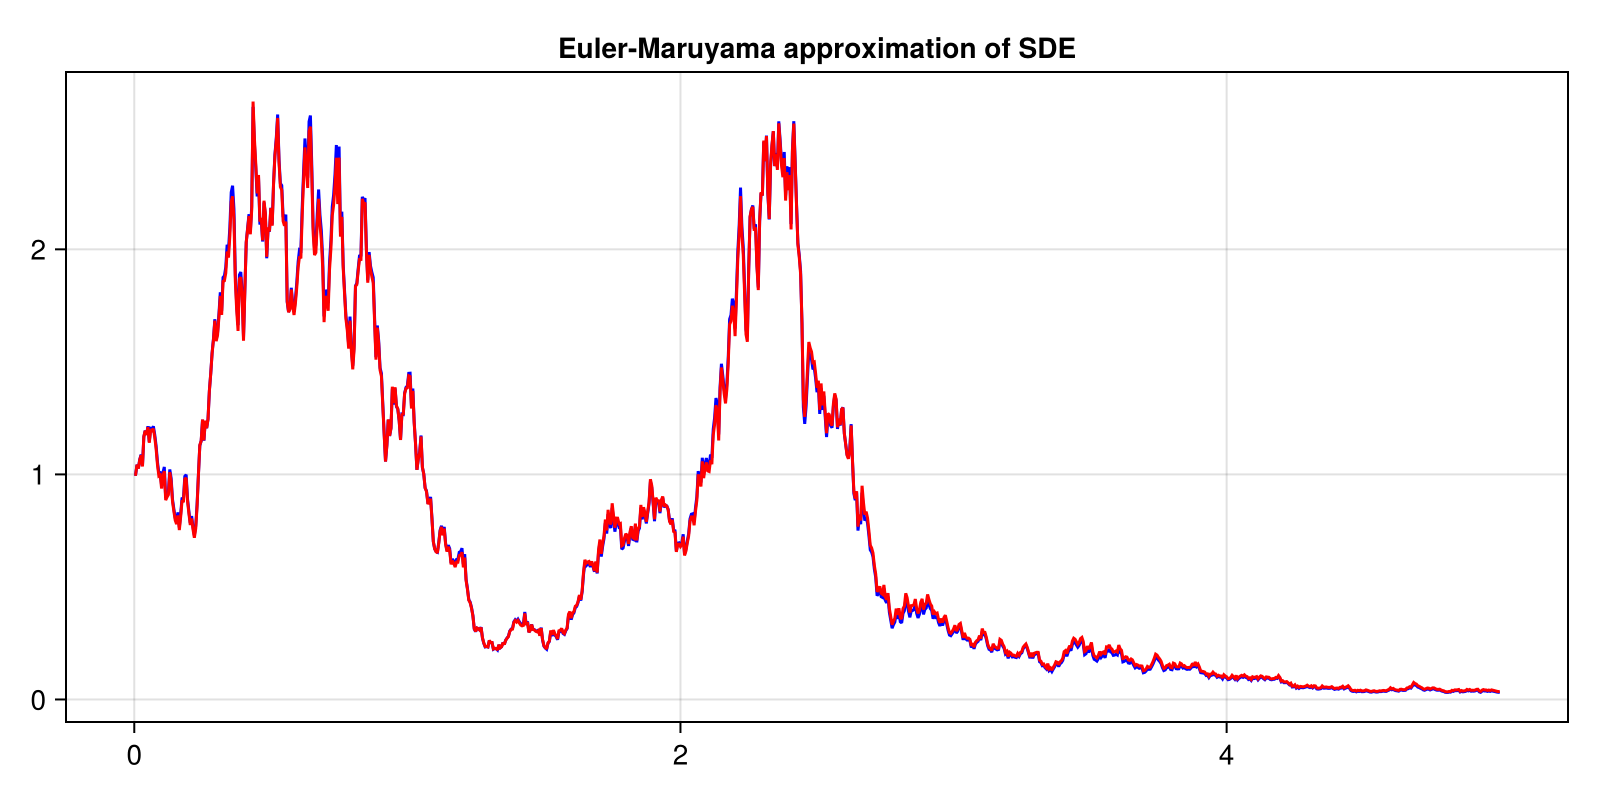

In [2]:
using Random, CairoMakie

Random.seed!(1234)

function alpha(t)
    return sin(t)
end

function beta(t)
    return t / (1 + t)
end

Xzero = 1

T = 5
N = 1000
dt = T / N

Xem1 = zeros(N+1)
Xem2 = zeros(N+1)

Xem1[1] = Xzero
Xem2[1] = 0

for i in 1:N
    dW = sqrt(dt) * randn()
    Xem1[i+1] = Xem1[i] + alpha(i - 1) * Xem1[i] * dt + beta(i - 1) * Xem1[i] * dW
    Xem2[i+1] = Xem2[i] + (alpha(i - 1) - 0.5 * beta(i - 1)^2) * dt + beta(i - 1) * dW
end

Xem2 = exp.(Xem2) .* Xzero

fig = Figure(resolution = (800, 400))

ax1 = Axis(fig[1, 1], title = "Euler-Maruyama approximation of SDE")

lines!(ax1, 0:dt:T, Xem1, color = :blue)
lines!(ax1, 0:dt:T, Xem2, color = :red)

fig

In [3]:
print(abs(Xem1[end] - Xem2[end]))

0.003351549985463838